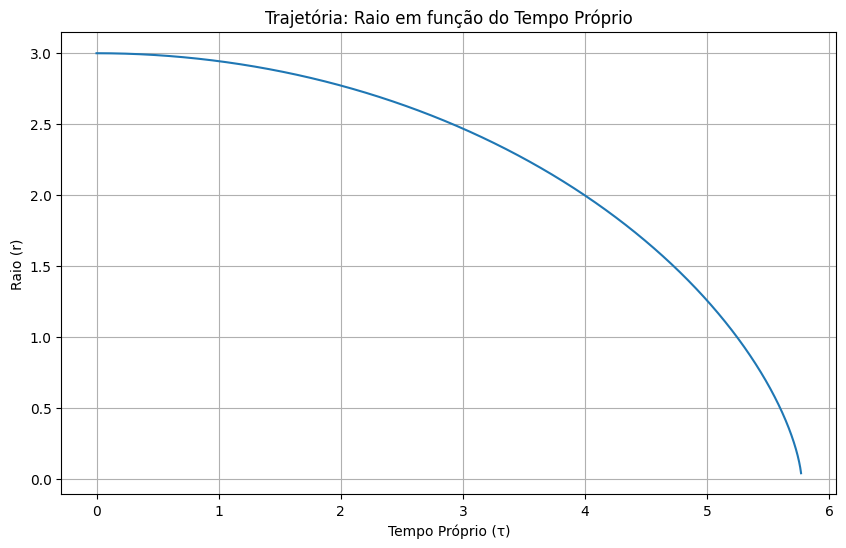

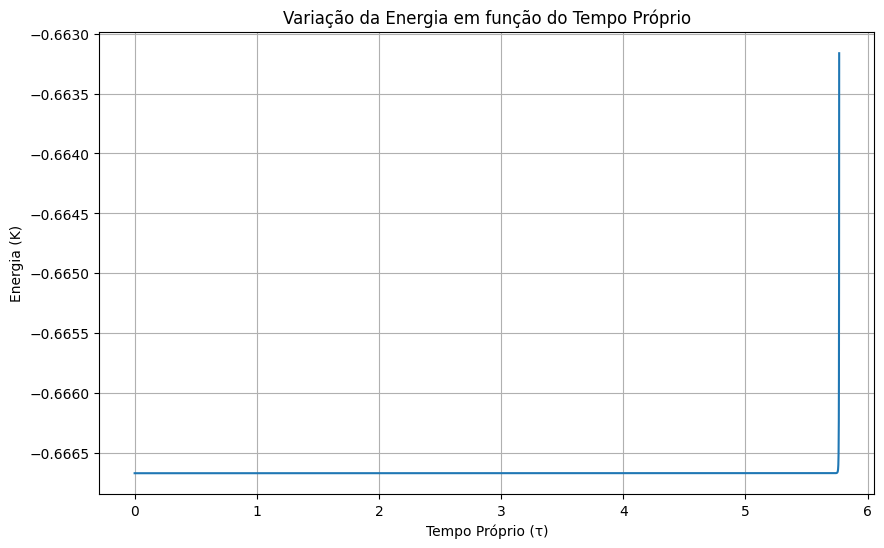

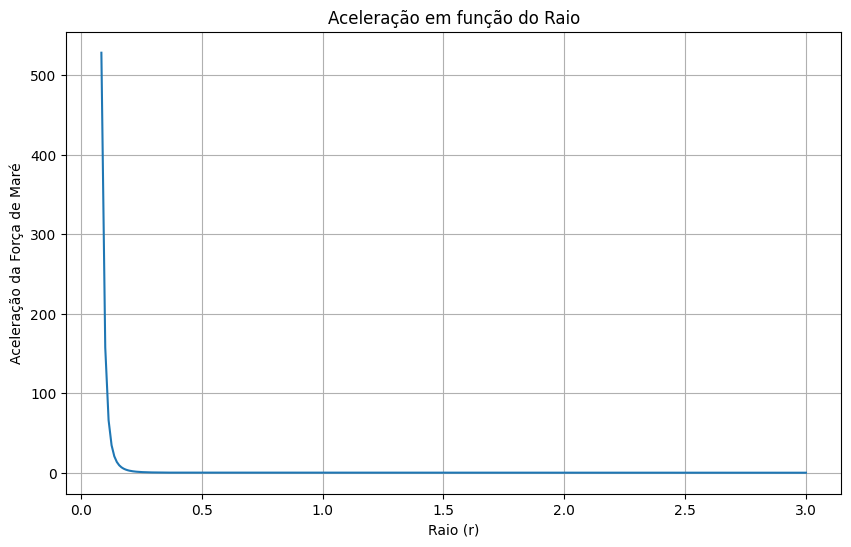

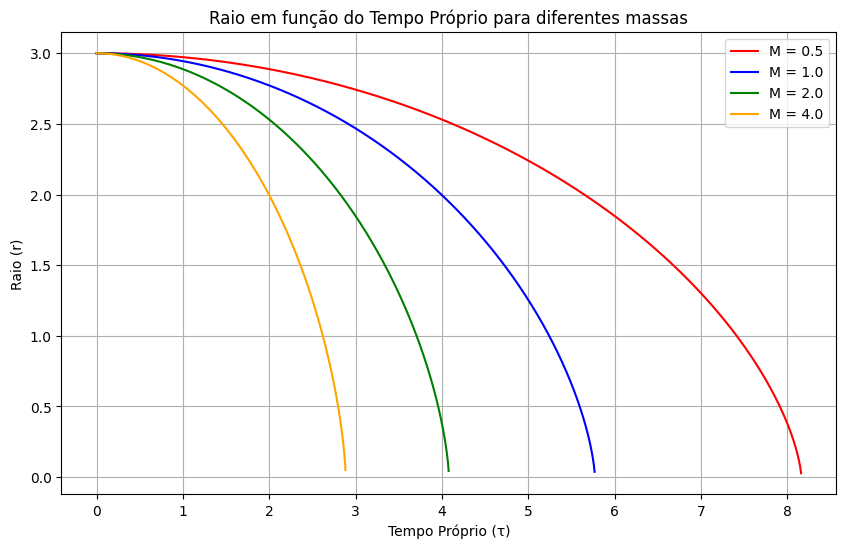

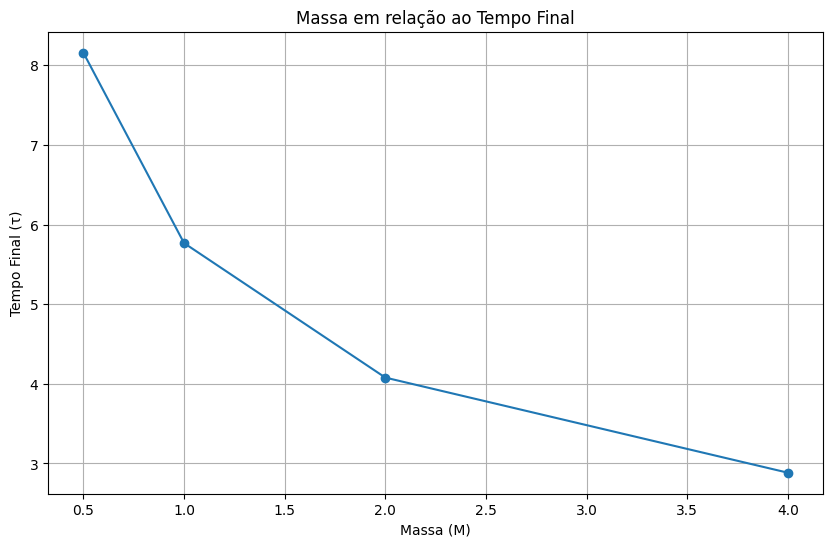

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def U_func(u, v, M):
    return v

def W_func(u, v, M):
    return (2 * (v**2) / u) + M * u**4

def mergulho(r0, v0, h, epsilon, M):
    # Condições iniciais
    u0 = 1 / r0
    w0 = 0

    # Inicialização das variáveis
    u_valores = [u0]
    w_valores = [w0]
    tau = 0
    tau_valores = [tau]

    # Constantes precomputadas
    h2 = h / 2
    p1 = h / 6
    p2 = 2 * p1
    maxU = 1 / epsilon

    # Inicializa primeiros elementos
    u = u0
    w = w0

    K0 = ((-w0 / (u0**2))**2) - 2 * M * u0
    tau_final = 0
    K_valores = [K0]
    K_anterior = K0
    
    continuar_simulacao = True

    # Runge-Kutta
    while u < maxU and continuar_simulacao:
        # Verificar conservação de energia
        K = ((-w / u**2)**2) - 2 * M * u
        
        if abs((K / K0) - 1) >= 0.01:
            tau_final = tau
            K = K_anterior
            continuar_simulacao = False
        else:
            K_anterior = K
            
            # Cálculos do método de Runge-Kutta
            du = U_func(u, w, M)
            dw = W_func(u, w, M)

            diu = U_func(u + h2 * du, w + h2 * dw, M)
            diw = W_func(u + h2 * du, w + h2 * dw, M)

            d2u = U_func(u + h2 * diu, w + h2 * diw, M)
            d2w = W_func(u + h2 * diu, w + h2 * diw, M)

            d3u = U_func(u + h * d2u, w + h * d2w, M)
            d3w = W_func(u + h * d2u, w + h * d2w, M)

            # Atualiza u, w e tau
            u = u + (p1 * du + p2 * (diu + d2u) + p1 * d3u)
            w = w + (p1 * dw + p2 * (diw + d2w) + p1 * d3w)
            tau = tau + h

            # Armazena valores
            u_valores.append(u)
            w_valores.append(w)
            tau_valores.append(tau)
            K_valores.append(K)

    # Transformar de volta para r e v
    r_valores = 1 / np.array(u_valores)
    v_valores = -np.array(w_valores) / (np.array(u_valores)**2)
    r_final = r_valores[-1]

    return r_valores, v_valores, r_final, tau_valores, tau_final, K_valores

def V_func(u, v, M):
    return v

def P_func(u, v, M):
    return 2*v/u + 3*M*v*(u**2) + M*(u**4) + 2*(M**2)*u**5

def mare(r0, v0, h, epsilon, M, g):
    # Parâmetros para os dois pontos iniciais
    r02 = r0 + g
    u0 = 1 / r0
    u02 = 1 / r02
    w0 = 0
    w02 = 0
    V = 0
    V2 = g / (1 - (2 * M / r02))

    V_valores = [V]
    u_valores = [u0]
    w_valores = [w0]
    V2_valores = [V2]
    u2_valores = [u02]
    w2_valores = [w02]

    # Inicializa primeiros elementos
    u = u0
    w = w0
    u2 = u02
    w2 = w02

    # Constantes precomputadas
    h2 = h / 2
    p1 = h / 6
    p2 = 2 * p1
    maxU = 1 / epsilon

    # Runge-Kutta para o primeiro ponto
    while u < maxU:
        du = V_func(u, w, M)
        du2 = V_func(u2, w2, M)
        dw = P_func(u, w, M)
        dw2 = P_func(u2, w2, M)

        diu = V_func(u + h2 * du, w + h2 * dw, M)
        diu2 = V_func(u2 + h2 * du2, w2 + h2 * dw2, M)
        diw = P_func(u + h2 * du, w + h2 * dw, M)
        diw2 = P_func(u2 + h2 * du2, w2 + h2 * dw2, M)

        d2u = V_func(u + h2 * diu, w + h2 * diw, M)
        d2u2 = V_func(u2 + h2 * diu2, w2 + h2 * diw2, M)
        d2w = P_func(u + h2 * diu, w + h2 * diw, M)
        d2w2 = P_func(u2 + h2 * diu2, w2 + h2 * diw2, M)

        d3u = V_func(u + h * d2u, w + h * d2w, M)
        d3u2 = V_func(u2 + h * d2u2, w2 + h * d2w2, M)
        d3w = P_func(u + h * d2u, w + h * d2w, M)
        d3w2 = P_func(u2 + h * d2u2, w2 + h * d2w2, M)

        # Atualiza u, w e V
        u = u + (p1 * du + p2 * (diu + d2u) + p1 * d3u)
        u2 = u2 + (p1 * du2 + p2 * (diu2 + d2u2) + p1 * d3u2)
        w = w + (p1 * dw + p2 * (diw + d2w) + p1 * d3w)
        w2 = w2 + (p1 * dw2 + p2 * (diw2 + d2w2) + p1 * d3w2)
        V = V + h
        V2 = V2 + h

        # Armazena valores
        u_valores.append(u)
        w_valores.append(w)
        V_valores.append(V)

        u2_valores.append(u2)
        w2_valores.append(w2)
        V2_valores.append(V2)

    # Transformar de volta para r e v para o primeiro ponto
    r = 1 / np.array(u_valores)

    # Transformar de volta para r e v para o segundo ponto
    r2 = 1 / np.array(u2_valores)

    return r, r2, V_valores, V2_valores

def metrica(r0, v0, r1, v1, M):
    delta_v = v1 - v0
    delta_r = r1 - r0
    r_medio = (r0 + r1) / 2
    ds2 = -(1 - 2 * M / r_medio) * delta_v**2 + 2 * delta_v * delta_r
    return ds2

# Função para calcular forças de maré usando interpolação
def calcular_forca_mare(tau_valores, dl_valores):
    # Usando interpolação polinomial de Lagrange
    poly = lagrange(tau_valores[-3:], dl_valores[-3:])
    dl_dot = poly.deriv()(tau_valores[-1])  # primeira derivada
    dl_ddot = poly.deriv().deriv()(tau_valores[-1])  # segunda derivada (aceleração)
    return dl_ddot

# Exemplo de uso e geração de gráficos
if __name__ == "__main__":
    # Parâmetros
    M = 1.0
    r0 = 3.0
    v0 = 0.0
    h = 0.001
    epsilon = 0.01
    g = 0.001  # pequena separação para forças de maré

    # Simular mergulho
    r_valores, v_valores, r_final, tau_valores, tau_final, K_valores = mergulho(r0, v0, h, epsilon, M)
    
    # Gráfico 1: Trajetória (Raio vs Tempo Próprio)
    plt.figure(figsize=(10, 6))
    plt.plot(tau_valores, r_valores)
    plt.xlabel('Tempo Próprio (τ)')
    plt.ylabel('Raio (r)')
    plt.title('Trajetória: Raio em função do Tempo Próprio')
    plt.grid(True)
    plt.savefig('Tempoproprio.png')
    plt.show()

    # Gráfico 2: Variação de Energia
    plt.figure(figsize=(10, 6))
    plt.plot(tau_valores, K_valores)
    plt.xlabel('Tempo Próprio (τ)')
    plt.ylabel('Energia (K)')
    plt.title('Variação da Energia em função do Tempo Próprio')
    plt.grid(True)
    plt.savefig('variacaoenergia.png')
    plt.show()

    # Simular forças de maré
    r_mare, r2_mare, V_valores, V2_valores = mare(r0, v0, h, epsilon, M, g)
    
    # Calcular dl (separação) entre os dois pontos
    dl_valores = np.abs(r2_mare - r_mare)
    
    # Calcular aceleração da força de maré
    aceleracao_mare = calcular_forca_mare(V_valores, dl_valores)
    
    # Gráfico 3: Forças de Maré (Aceleração vs Raio)
    plt.figure(figsize=(10, 6))
    plt.plot(r_mare[:-3], [calcular_forca_mare(V_valores[:i+3], dl_valores[:i+3]) 
                          for i in range(len(r_mare)-3)])
    plt.xlabel('Raio (r)')
    plt.ylabel('Aceleração da Força de Maré')
    plt.title('Aceleração em função do Raio')
    plt.grid(True)
    plt.savefig('Raio_x_forca_mare.png')
    plt.show()

    # Simular para diferentes massas e criar gráficos adicionais
    massas = [0.5, 1.0, 2.0, 4.0]
    cores = ['red', 'blue', 'green', 'orange']
    
    plt.figure(figsize=(10, 6))
    for massa, cor in zip(massas, cores):
        r_vals, _, _, tau_vals, _, _ = mergulho(r0, v0, h, epsilon, massa)
        plt.plot(tau_vals, r_vals, color=cor, label=f'M = {massa}')
    
    plt.xlabel('Tempo Próprio (τ)')
    plt.ylabel('Raio (r)')
    plt.title('Raio em função do Tempo Próprio para diferentes massas')
    plt.legend()
    plt.grid(True)
    plt.savefig('Screen_Shot_2024-09-26_at_18.22.38.png')
    plt.show()

    # Gráfico Massa vs Tempo Final
    tempos_finais = []
    for massa in massas:
        _, _, _, tau_vals, tau_final, _ = mergulho(r0, v0, h, epsilon, massa)
        tempos_finais.append(tau_final if tau_final > 0 else tau_vals[-1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(massas, tempos_finais, 'o-')
    plt.xlabel('Massa (M)')
    plt.ylabel('Tempo Final (τ)')
    plt.title('Massa em relação ao Tempo Final')
    plt.grid(True)
    plt.savefig('Screen_Shot_2024-09-15_at_13.22.00.png')
    plt.show()